# YouTube exploratory data analysis

# Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
init_notebook_mode(connected=True) 

# Creating a dataframe

In [4]:
df = pd.read_csv('List of most-subscribed YouTube channels (1).csv')

In [5]:
df.head(10)

,Rank,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,1,T-Series,Yes,232.0,Hindi[7][8],Music,India
1,2,Cocomelon,Yes,150.0,English,Education,United States
2,3,Sony Entertainment Television India,Yes,149.0,Hindi[9],Entertainment,India
3,4,MrBeast,No,124.0,English,Entertainment,United States
4,5,PewDiePie,No,111.0,English,Entertainment,Sweden
5,6,Kids Diana Show,Yes,106.0,English[10][11][12],Film,Ukraine
6,7,Like Nastya,No,103.0,English,Entertainment,United States
7,8,WWE,Yes,92.4,English,Professional wrestling,United States
8,9,Vlad and Niki,No,91.9,English,Entertainment,Russia
9,10,Zee Music Company,Yes,91.0,Hindi[13][14],Music,India


# Important information about the dataset

In [6]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [7]:
df.columns

Index(['Rank', 'Name', 'Brand channel', 'Subscribers (millions)',
       'Primary language', 'Category', 'Country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    50 non-null     int64  
 1   Name                    50 non-null     object 
 2   Brand channel           50 non-null     object 
 3   Subscribers (millions)  50 non-null     float64
 4   Primary language        50 non-null     object 
 5   Category                50 non-null     object 
 6   Country                 50 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,50.0,25.500,14.577380,1.0,13.25,25.5,37.750,50.0
Subscribers (millions),50.0,70.442,34.660653,44.0,50.05,57.5,77.475,232.0


In [10]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,50.0,NaN,NaN,NaN,25.5,14.57738,1.0,13.25,25.5,37.75,50.0
Name,50,49,Sony Music India,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand channel,50,2,Yes,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Subscribers (millions),50.0,NaN,NaN,NaN,70.442,34.660653,44.0,50.05,57.5,77.475,232.0
Primary language,50,11,English,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,50,9,Music,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,50,16,India,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Rank                      0
Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

# Cleaning the 'Primary language' column

In [13]:
df['Primary language']

0             Hindi[7][8]
1                 English
2                Hindi[9]
3                 English
4                 English
5     English[10][11][12]
6                 English
7                 English
8                 English
9           Hindi[13][14]
10                 Korean
11                  Hindi
12                English
13                  Hindi
14                 Korean
15                English
16                 Korean
17             Portuguese
18                  Hindi
19                English
20                  Hindi
21              Hindi[16]
22                  Hindi
23                English
24                English
25                  Hindi
26                English
27                  Hindi
28               Bhojpuri
29                  Hindi
30                  Hindi
31                English
32                Spanish
33                English
34                English
35                English
36                English
37                  Hindi
38          

In [14]:
def cleanLang(str):
    only_alpha = ""
    for char in str:
        if(char.isalpha()==True):
            only_alpha +=char
    return only_alpha

In [15]:
df['Primary language'] = df['Primary language'].apply(cleanLang)

In [16]:
df.head(10)

,Rank,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,1,T-Series,Yes,232.0,Hindi,Music,India
1,2,Cocomelon,Yes,150.0,English,Education,United States
2,3,Sony Entertainment Television India,Yes,149.0,Hindi,Entertainment,India
3,4,MrBeast,No,124.0,English,Entertainment,United States
4,5,PewDiePie,No,111.0,English,Entertainment,Sweden
5,6,Kids Diana Show,Yes,106.0,English,Film,Ukraine
6,7,Like Nastya,No,103.0,English,Entertainment,United States
7,8,WWE,Yes,92.4,English,Professional wrestling,United States
8,9,Vlad and Niki,No,91.9,English,Entertainment,Russia
9,10,Zee Music Company,Yes,91.0,Hindi,Music,India


# Cleaning the 'Country' column

In [17]:
df['Country'].value_counts()

 India                           17
 United States                   12
 South Korea                      4
 Brazil                           4
 Cyprus[a]                        2
 Sweden                           1
 Ukraine                          1
 Russia                           1
 Canada                           1
 Argentina                        1
 United Kingdom                   1
 Romania                          1
 Chile                            1
 Mexico                           1
 El Salvador                      1
 United States ( Puerto Rico)     1
Name: Country, dtype: int64

In [18]:
df[df['Country']=='\xa0Cyprus[a]']

,Rank,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
12,13,5-Minute Crafts,Yes,78.2,English,How-to,Cyprus[a]
47,48,Bright Side,Yes,44.3,English,Education,Cyprus[a]


In [19]:
df['Country'] = df['Country'].replace('\xa0Cyprus[a]','Cyprus')

# Total number of Youtube channels in each Category

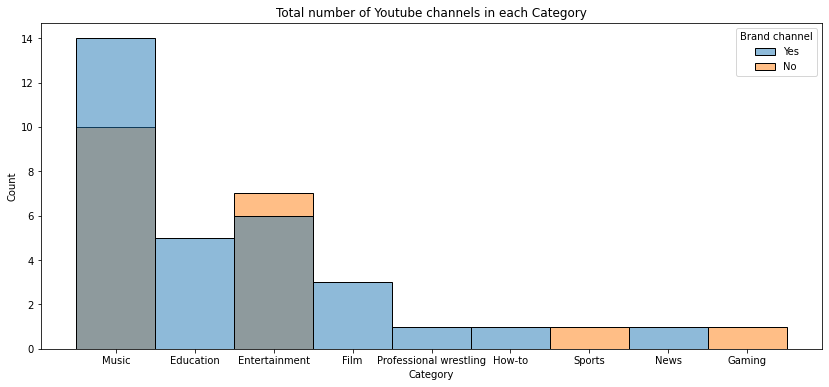

In [20]:
fig = plt.figure(figsize=(14,6))

ax = sns.histplot(x='Category', data=df, hue='Brand channel')
ax.set_title('Total number of Youtube channels in each Category')

plt.show()

# Total number of Youtube channels for each Language

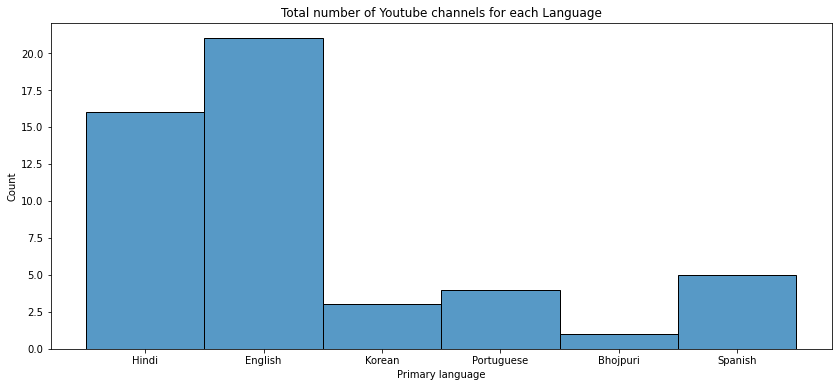

In [21]:
fig = plt.figure(figsize=(14,6))

ax = sns.histplot(x='Primary language', data=df,)
ax.set_title('Total number of Youtube channels for each Language')

plt.show()

# Total Number of Youtube channels for each Country

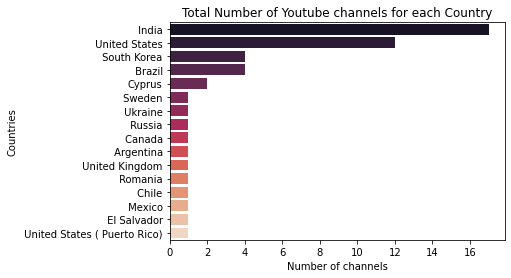

In [22]:
x = df['Country'].value_counts().values
y = df['Country'].value_counts().index

ax = sns.barplot(x=x, y=y, data=df, palette='rocket')
ax.set_xlabel('Number of channels')
ax.set_ylabel('Countries')
ax.set_title('Total Number of Youtube channels for each Country')

plt.show()

# Countplot for Brand channel

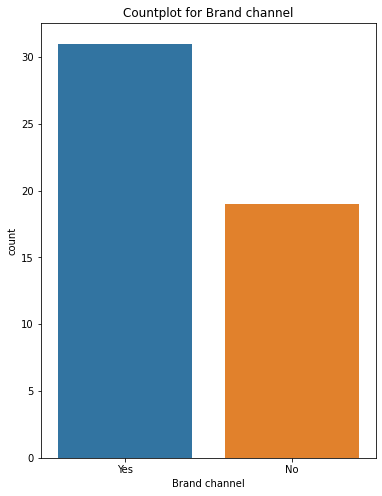

In [23]:
fig = plt.figure(figsize=(6,8))

ax = sns.countplot(x='Brand channel', data=df)
ax.set_title('Countplot for Brand channel')

plt.show()

# Total number of Subscribers for each Language

In [24]:
df[['Subscribers (millions)','Primary language']].groupby('Primary language').sum()

,Subscribers (millions)
Primary language,
Bhojpuri,55.3
English,1565.5
Hindi,1239.0
Korean,225.5
Portuguese,199.0
Spanish,237.8


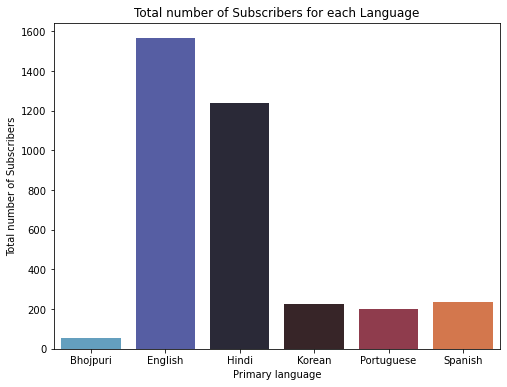

In [25]:
x = df[['Subscribers (millions)','Primary language']].groupby('Primary language').sum().index
y = df[['Subscribers (millions)','Primary language']].groupby('Primary language').sum().values
y = y.flatten()
data = df[['Subscribers (millions)','Primary language']].groupby('Primary language').sum()

fig = plt.figure(figsize=(8,6))
ax = sns.barplot(x=x, y=y,data=data, palette='icefire')
ax.set_title('Total number of Subscribers for each Language')
ax.set_ylabel('Total number of Subscribers')

plt.show()

# Total number of Subscribers for each Category

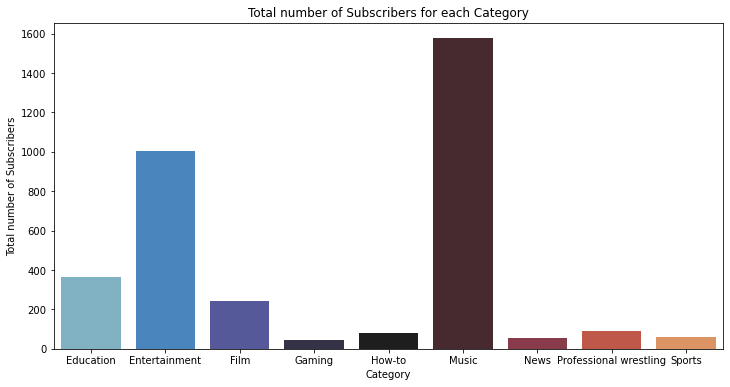

In [26]:
x = df[['Subscribers (millions)','Category']].groupby('Category').sum().index
y = df[['Subscribers (millions)','Category']].groupby('Category').sum().values
y = y.flatten()
data = df[['Subscribers (millions)','Category']].groupby('Category').sum()

fig = plt.figure(figsize=(12,6))
ax = sns.barplot(x=x, y=y,data=data, palette='icefire')
ax.set_title('Total number of Subscribers for each Category')
ax.set_ylabel('Total number of Subscribers')

plt.show()

# Total number of Subscribers for each Country

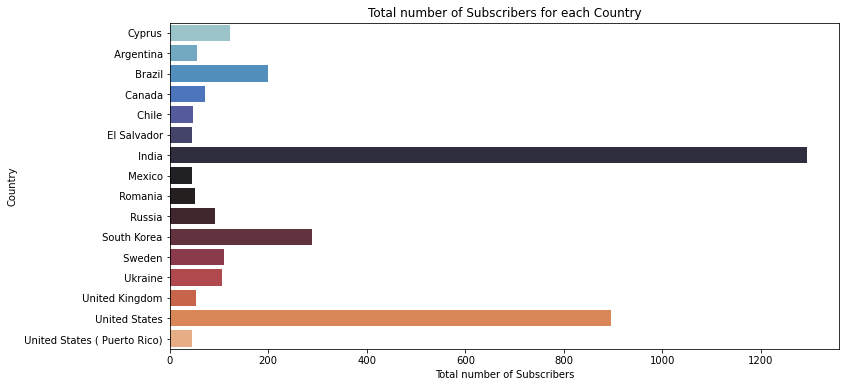

In [27]:
x = df[['Subscribers (millions)','Country']].groupby('Country').sum().values
x = x.flatten()
y = df[['Subscribers (millions)','Country']].groupby('Country').sum().index

data = df[['Subscribers (millions)','Country']].groupby('Country').sum()
fig = plt.figure(figsize=(12,6))
ax = sns.barplot(x=x, y=y,data=data, palette='icefire')
ax.set_title('Total number of Subscribers for each Country')
ax.set_xlabel('Total number of Subscribers')
ax.set_ylabel('Country')

plt.show()

In [28]:
df.head()

,Rank,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,1,T-Series,Yes,232.0,Hindi,Music,India
1,2,Cocomelon,Yes,150.0,English,Education,United States
2,3,Sony Entertainment Television India,Yes,149.0,Hindi,Entertainment,India
3,4,MrBeast,No,124.0,English,Entertainment,United States
4,5,PewDiePie,No,111.0,English,Entertainment,Sweden


# Total number of Subscribers for each Country

In [29]:
loc = df[['Subscribers (millions)','Country']].groupby('Country').sum().index
value = df[['Subscribers (millions)','Country']].groupby('Country').sum().values.flatten()
data = dict(type='choropleth', locations=loc,locationmode='country names', z=value, text=value, colorbar={'title':'Subscribers'})
layout=dict(title='Total number of Subscribers for each Country', geo=dict(showframe=True,projection={'type':'mercator'}))

choromap3 = go.Figure(data=[data], layout=layout)

iplot(choromap3)

# Most subscribed Youtube channel

In [30]:
df[['Name','Subscribers (millions)']].sort_values('Subscribers (millions)',ascending=False).iloc[0]['Name']

'T-Series'

# Highest number of Subscribers for a Youtube channel

In [31]:
df[['Name','Subscribers (millions)']].sort_values('Subscribers (millions)',ascending=False).iloc[0]['Subscribers (millions)']

232.0

# Total number of branded and unbranded channels

In [32]:
df['Brand channel'].value_counts()

Yes    31
No     19
Name: Brand channel, dtype: int64

# Highest number of Subscribers for a Branded Youtube channel

In [33]:
df1 = df[['Name','Subscribers (millions)','Brand channel']].sort_values('Subscribers (millions)',ascending=False)
df1[df1['Brand channel']=='Yes'].sort_values('Subscribers (millions)', ascending=False).iloc[0]

Name                      T-Series
Subscribers (millions)       232.0
Brand channel                  Yes
Name: 0, dtype: object

# Highest number of Subscribers for an unbranded Youtube channel

In [34]:
df1 = df[['Name','Subscribers (millions)','Brand channel']].sort_values('Subscribers (millions)',ascending=False)
df1[df1['Brand channel']=='No'].sort_values('Subscribers (millions)', ascending=False).iloc[0]

Name                      MrBeast
Subscribers (millions)      124.0
Brand channel                  No
Name: 3, dtype: object

# Language used by the most Subscribed Youtube channel

In [35]:
df[['Name','Subscribers (millions)','Primary language']].sort_values('Subscribers (millions)',ascending=False).iloc[0]['Primary language']

'Hindi'

# Category of the most Subscribed Youtube channel

In [36]:
df[['Name','Subscribers (millions)','Category']].sort_values('Subscribers (millions)',ascending=False).iloc[0]['Category']

'Music'

# Country of the most Subscribed Youtube channel

In [37]:
df[['Name','Subscribers (millions)','Country']].sort_values('Subscribers (millions)',ascending=False).iloc[0]

Name                      T-Series
Subscribers (millions)       232.0
Country                      India
Name: 0, dtype: object

# Thankyou